In [ ]:
2/8/2024 - finished 4hr andrej video and written these notes

## Batch Normalization Definition

query: whats batch normalization again

---

Batch normalization is a technique used in training neural networks to stabilize and accelerate the training process. It achieves this by normalizing the inputs of each layer within a mini-batch. Here's a breakdown of how it works and why it's beneficial:

### How Batch Normalization Works:
1. **Normalization**: For each mini-batch during training, batch normalization adjusts and scales the activations. It first computes the mean and variance of the batch for each feature independently. Then, it subtracts the mean and divides by the square root of the variance plus a small constant (to avoid division by zero), making the outputs zero-mean and unit-variance.

2. **Scaling and Shifting**: After normalization, batch normalization introduces two trainable parameters per feature: a scale factor (γ) and a shift factor (β). These parameters are learned along with the original model parameters during training and allow the normalization process to maintain the representational capacity of the network. Essentially, they allow the network to undo the normalization if it turns out to be detrimental for some features.

### Benefits of Batch Normalization:
- **Improves Gradient Flow**: By normalizing the inputs across mini-batches, it helps mitigate the problem of internal covariate shift, where the distribution of inputs to layers changes as the parameters of the previous layers change. This stabilization can lead to faster convergence during training.
- **Allows Higher Learning Rates**: Stabilizing the input distributions means the training can typically proceed with larger learning rates, speeding up network training.
- **Reduces Overfitting**: Incorporating batch normalization has a slight regularization effect. Because the characteristics of each mini-batch vary, this adds some noise to the activation values within the network. This noise can lead to a regularization effect, somewhat similar to dropout.
- **Simplifies Initialization**: Batch normalization makes the training process less sensitive to the initial starting weights. This can be particularly useful when training very deep networks.

### Usage:
Batch normalization is usually applied after the convolutional or fully connected layers but before non-linear activations like ReLU. In code (using PyTorch for example), it might look something like this when defining a neural network:

```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(in_features=100, out_features=50)
        self.bn1 = nn.BatchNorm1d(50)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu(x)
        return x
```

In this example, `BatchNorm1d` is applied to a linear layer's output before the ReLU activation function, ensuring that the inputs to the activation function are normalized.

## Global Norm Definition

query: explain to me whats global norm of gradient again

---

The global norm of gradients, often used in the context of training neural networks, especially when employing techniques like gradient clipping, is a measure used to stabilize and improve the training process across all parameters of the model.

### What is Global Norm of Gradient?

The global norm of gradients refers to the total size of the gradients for all model parameters considered together. It's computed as follows:

1. **Compute the Norms**: First, the norm (usually the L2 norm, which is the square root of the sum of the squares of the components) is calculated for the gradient of each parameter in the model.
  
2. **Sum the Squares**: The squares of these norms are summed together.

3. **Square Root of Sum**: Finally, the square root of this sum is taken to get the global norm.

This measure gives a single scalar value representing the magnitude of the gradients across the entire model, which is particularly useful for controlling how gradients are updated during the optimization process, especially in complex models that might otherwise experience issues with exploding or vanishing gradients.

### Purpose and Application in Training

- **Gradient Clipping**: One common use of the global norm is in gradient clipping. This technique involves setting a threshold for the global norm and if the computed global norm exceeds this threshold, all gradients are scaled down proportionally so that the norm equals the threshold. This prevents any single update from being too large and destabilizing the learning process, which can be crucial in training deep neural networks with gradients prone to large fluctuations.
  
  Here’s a simple example using PyTorch:
  
  ```python
  import torch

  def clip_gradients(model, max_norm):
      total_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
      return total_norm  # This is the global norm after potential clipping
  ```

  In this example, `clip_grad_norm_` ensures that the global norm of all gradients in `model.parameters()` does not exceed `max_norm`. If it does, it scales all gradients down by the necessary factor to meet the threshold.

### Benefits

- **Stabilizes Training**: By controlling the global norm of gradients, training becomes more stable. Large updates that could result in diverging network behaviors are avoided.
- **Enhances Convergence**: It can help in faster convergence in some cases by avoiding harmful steps.
- **Deals with Exploding Gradients**: Particularly important in training RNNs and other architectures susceptible to exploding gradients.

By monitoring and potentially limiting the global norm of gradients, deep learning practitioners can ensure more robust and stable training across diverse architectures and datasets.

## L1, L2, L3 Normalization

query: whats L1, L2, L3 normalisation again. explain by example

---

L1, L2, and L3 normalization are techniques used to scale or adjust the values in a vector or dataset to have a specific mathematical property. Each type refers to a different norm calculation, often used in various data processing and machine learning applications to ensure that numerical values are on a comparable scale. Here's a brief overview of each, with examples:

### L1 Normalization
Also known as least absolute deviations, this method scales the vector so that the sum of the absolute values of its components is equal to 1. It is often used when the magnitude of the data matters and when you want to ensure robustness against outliers.

**Example**:
Suppose you have a vector `v = [4, -2, 1]`. The L1 norm of this vector is calculated as \( \|v\|_1 = |4| + |-2| + |1| = 7 \). To normalize this vector using L1 normalization, you would divide each element by the L1 norm:

\[ v_{\text{normalized}} = \left[\frac{4}{7}, \frac{-2}{7}, \frac{1}{7}\right] \]

### L2 Normalization
This is the most common type of normalization, which scales the vector so that the sum of the squares of its components is equal to 1. It's used in methods where the Euclidean distance is important, such as in the calculation of distances in K-Nearest Neighbors or in the optimization algorithms in neural networks.

**Example**:
Take the same vector `v = [4, -2, 1]`. The L2 norm (Euclidean norm) is \( \|v\|_2 = \sqrt{4^2 + (-2)^2 + 1^2} = \sqrt{21} \). L2 normalization would then make the vector:

\[ v_{\text{normalized}} = \left[\frac{4}{\sqrt{21}}, \frac{-2}{\sqrt{21}}, \frac{1}{\sqrt{21}}\right] \]

### L3 Normalization
Though less common, L3 normalization involves scaling the vector so that the sum of the cubes of its components is equal to 1. It's more of a theoretical construct and is less commonly seen in practical applications but can be useful in specific contexts where higher powers than square are beneficial to emphasize larger values more.

**Example**:
Again, using `v = [4, -2, 1]`, the L3 norm (sum of the cubes) is \( \|v\|_3 = |4|^3 + |-2|^3 + |1|^3 = 64 + (-8) + 1 = 57 \). L3 normalization would transform the vector to:

\[ v_{\text{normalized}} = \left[\frac{4}{\sqrt[3]{57}}, \frac{-2}{\sqrt[3]{57}}, \frac{1}{\sqrt[3]{57}}\right] \]

Each of these normalization methods serves different purposes and is chosen based on the specific requirements of the dataset or the algorithm's sensitivity to the magnitude or distribution of the data values.

query: what do each of them do. why are they even done.

---

Normalization techniques like L1, L2, and L3 serve primarily to standardize the data dimensions, ensuring that they contribute equally to the analysis or model training. Each type of normalization impacts the data differently and is selected based on the specific requirements or desired properties in the data processing or machine learning context. Here's what each does and why they might be used:

### L1 Normalization (Manhattan Norm)
- **Purpose**: L1 normalization scales a vector so that the sum of the absolute values of its components is 1. It helps in making the model robust to outliers and anomalies in the data because outliers would have less impact on the sum compared to a quadratic sum (as in L2).
- **Use Cases**:
  - Feature scaling in linear regression models where outliers might skew the model unfairly.
  - Compressive sensing, where sparse solutions are preferred.

### L2 Normalization (Euclidean Norm)
- **Purpose**: L2 normalization, or vector normalization to unit length, scales the vector so that the square root of the sum of the squared vector components equals 1. This is useful in scenarios where the Euclidean distance is a meaningful measure, such as in the calculation of distances in cluster analysis or nearest neighbor algorithms.
- **Use Cases**:
  - Preprocessing data for machine learning algorithms that are sensitive to the magnitude of input data, such as neural networks, where it helps in avoiding the vanishing or exploding gradients problem.
  - Cosine similarity calculations in text analysis, where the angle between vectors (and not their magnitude) matters.

### L3 Normalization
- **Purpose**: L3 normalization scales the vector such that the sum of the cubes of its components equals 1. This type of normalization emphasizes larger values more heavily than smaller ones, making it useful in contexts where the magnitude of larger numbers should have more influence.
- **Use Cases**:
  - This form is less common in practice but can be useful in specialized statistical models or signal processing where the distribution of the data is skewed or has heavy tails, and the emphasis is on larger values.

**General Reasons for Normalization:**
1. **Equal Contribution**: Normalization ensures that each feature contributes equally to analysis or model training, preventing features with larger scales from dominating the decision process.
2. **Improved Convergence**: Algorithms that use gradient-based optimization methods often converge faster when the input features are normalized.
3. **Stability**: Algorithms become numerically more stable (less prone to issues with floating-point precision) when the data are kept within a certain scale.
4. **Compatibility**: Some algorithms, particularly in machine learning, assume that all features are on the same scale, making normalization a critical preprocessing step.

In sum, normalization is about scaling the data to a consistent range and form, making it easier and more effective for analysis and predictive modeling across a wide range of applications.

query: whats "cosine similarity calculations in text analysiss"

---

Cosine similarity is a measure used in text analysis to determine how similar two documents (or text data points) are, irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In the context of text analysis, these vectors often represent text documents as tf-idf vectors (term frequency-inverse document frequency vectors), word embeddings, or any other numerical representation where each dimension corresponds to a feature (e.g., a specific word or token).

### How Cosine Similarity Works in Text Analysis:
1. **Vector Representation**: Each text document is converted into a vector. For example, in tf-idf weighting, each word or term in a document is scored based on its frequency in the document, tempered by its frequency in the overall dataset (corpus). This accounts for the importance of a term within a document relative to its commonness or rarity across all documents.

2. **Calculation of Cosine Angle**:
   - The cosine similarity metric calculates the cosine of the angle between two vectors. This value ranges from -1 to 1, where:
     - 1 indicates the same orientation (complete similarity).
     - 0 indicates orthogonality (no similarity).
     - -1 indicates completely opposite directions (complete dissimilarity).
   - The formula for cosine similarity between two vectors \( A \) and \( B \) is:
     \[
     \text{cosine similarity} = \frac{A \cdot B}{\|A\| \|B\|}
     \]
     where \( \cdot \) denotes the dot product of the vectors, and \( \|A\| \) and \( \|B\| \) are the norms (or magnitudes) of the vectors.

3. **Application**:
   - **Document Clustering**: Grouping similar documents together in applications such as news aggregation, literature reviews, or legal document analysis.
   - **Information Retrieval**: Ranking documents by relevance in response to a search query. The search query is converted into the same vector space as the documents, and its cosine similarity with each document is calculated.
   - **Recommendation Systems**: Recommending similar articles or papers based on text content similarity.
   - **Plagiarism Detection**: Identifying how much of a text is similar to other documents to detect potential plagiarism.

### Why Use Cosine Similarity in Text Analysis?
- **Size Independence**: It focuses on the orientation of vectors and not on their magnitude, making it useful in text analysis where the lengths of documents can vary greatly.
- **Effectiveness with High-Dimensional Data**: Text data often involve thousands to millions of dimensions (one per unique word); cosine similarity is effective at handling such high-dimensional data.

Cosine similarity is particularly valued in natural language processing and information retrieval for its ability to capture nuances in text similarity beyond mere word counts, providing a robust, context-sensitive measure of how texts relate to each other semantically.

query: so is L2, L1 normalisation etc. just as the name says. just normalising the vectors? but difference is L2 gives more influence to the larger values?

---

Yes, that's essentially correct. L1 and L2 normalizations are techniques to scale or modify the values in a vector, commonly used in data preprocessing to ensure that the scale of the inputs does not distort the behavior of learning algorithms. Here's how they differ and what they imply:

### L1 Normalization (Manhattan Norm)
- **What it Does**: L1 normalization scales the vector so that the sum of the absolute values of the vector elements is 1.
- **Formula**: For a vector \( x \) with elements \( x_1, x_2, \ldots, x_n \), the L1 norm is calculated as \( \|x\|_1 = \sum |x_i| \).
- **Effect**: It treats all values equally, regardless of their magnitude. This makes it useful for creating sparse vectors and is widely used in feature selection techniques where sparsity is desirable.

### L2 Normalization (Euclidean Norm)
- **What it Does**: L2 normalization adjusts the vector so that the sum of the squares of the vector elements is 1.
- **Formula**: For a vector \( x \), the L2 norm is \( \|x\|_2 = \sqrt{\sum x_i^2} \).
- **Effect**: L2 gives more influence to larger values, as squaring the values exaggerates the effect of larger elements and diminishes the impact of

## Global Norm reclarification

query: reexplain global norm of gradient to me again. this time showing me an example

---

The global norm of a gradient is a measure used in optimization, particularly in neural network training, to understand the overall magnitude of the gradients across all parameters of the model. It helps in assessing if gradients are exploding or vanishing during training, and is often used to normalize gradients to prevent numerical instabilities.

### Explanation:
The global gradient norm is calculated by combining the gradients of all model parameters into a single scalar value. It's particularly useful when training deep neural networks with many layers, where gradients can vary significantly across layers.

### Mathematical Representation:
Suppose a neural network has parameters \( \theta_1, \theta_2, \ldots, \theta_n \) and the corresponding gradients are \( g_1, g_2, \ldots, g_n \). The global norm (usually L2 norm) of the gradient is calculated as:

\[
\text{global norm} = \sqrt{\sum_{i=1}^n \|g_i\|^2}
\]

### Example:
Imagine a simple neural network with two layers. Each layer has its own set of weights and biases, thus having its own set of gradients after a backward pass:
- Gradients for layer 1 weights: \( g_{w1} = [0.5, -0.1] \)
- Gradients for layer 1 biases: \( g_{b1} = [0.05] \)
- Gradients for layer 2 weights: \( g_{w2} = [-0.2, 0.3] \)
- Gradients for layer 2 biases: \( g_{b2} = [-0.1] \)

To calculate the global gradient norm:
1. Compute the square of each gradient element.
2. Sum all the squared elements.
3. Take the square root of the sum.

\[
\text{global norm} = \sqrt{(0.5)^2 + (-0.1)^2 + (0.05)^2 + (-0.2)^2 + (0.3)^2 + (-0.1)^2}
\]
\[
= \sqrt{0.25 + 0.01 + 0.0025 + 0.04 + 0.09 + 0.01}
\]
\[
= \sqrt{0.4025}
\]
\[
\approx 0.634
\]

This value indicates the magnitude of the update step if you were to apply these gradients directly without any scaling. By monitoring such values during training, you can adjust the learning rate or apply techniques like gradient clipping to manage how updates are applied, ensuring stable and efficient convergence.

query: oh so its basically L2 normalisation but global?

---

Yes, exactly! The global norm of gradients is essentially the L2 norm calculated over all the gradients of the model parameters as a whole, rather than individually. It measures the overall strength of the gradient across the entire model, providing a comprehensive view that's crucial for adjusting training processes like learning rate scaling or gradient clipping. This global perspective helps prevent issues that might arise if any part of the model were updating too quickly or slowly compared to others.

## L1, L2 Regularization

tysm. now can you explain to me L1, L2, L3 regularization techniques. where are they used in ML. and try and explain with example so i can more easily visualise

---

L1, L2, and L3 regularization are techniques used in machine learning to prevent overfitting, which is when a model performs well on training data but poorly on unseen data. These techniques work by adding a penalty to the loss function used during training. Here’s how each one functions:

### L1 Regularization (Lasso Regularization)
- **How it works:** L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients. This can lead to some coefficients being zero, thus resulting in feature selection.
- **Usage:** L1 is useful when you have many features, and you expect only a few of them to be important. By zeroing some coefficients, it effectively reduces the number of features.
- **Example:** In a linear regression model \( f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n \), L1 regularization adds a term \( \lambda \sum |\beta_i| \) to the loss function. This can push some \( \beta_i \) to zero, simplifying the model.

### L2 Regularization (Ridge Regularization)
- **How it works:** L2 adds a penalty equal to the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (none are zeroed).
- **Usage:** L2 is used when we believe many features contribute small or moderate effects, and we need a model less sensitive to the training data.
- **Example:** In the same linear regression model, L2 adds \( \lambda \sum \beta_i^2 \) to the loss function. This discourages large values of \( \beta_i \) but doesn’t force them to zero.

### L3 Regularization
- **Note:** L3 regularization isn't standard in machine learning. Usually, when people mention L3, they might be referring to L2 regularization or a misunderstanding. The common techniques discussed are L1 and L2.

### Practical Example:
Imagine you're working on a housing price prediction model based on features like square footage, number of bedrooms, age of the home, proximity to the city center, and many other variables.

- **Using L1 Regularization:** This might help you identify which features (e.g., square footage and proximity to the city center) are the most important for predicting housing prices while disregarding less relevant features by setting their coefficients to zero.
- **Using L2 Regularization:** If you believe that all features contribute to the house price but want to ensure that no single feature dominates the prediction, you'd use L2. It would keep all features in the model but limit their influence.

Both of these methods help combat overfitting by keeping the model general enough to perform well on both seen and unseen data. Regularization parameters (lambda, λ) are tuned typically using a validation set or through cross-validation.

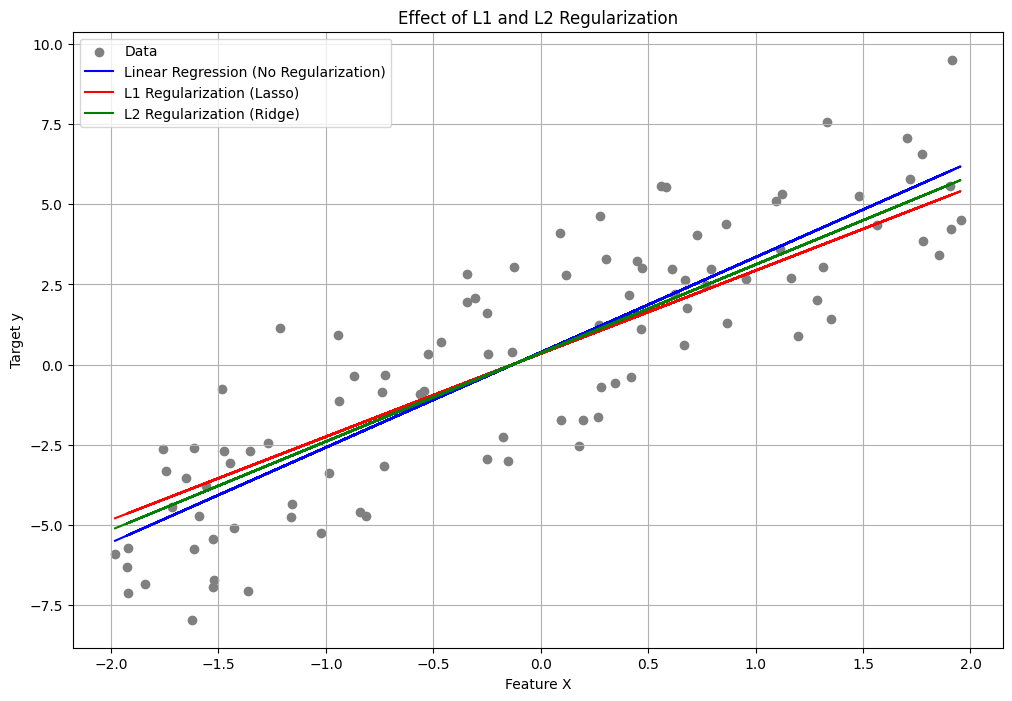

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 4 - 2  # Features from -2 to 2
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Ordinary Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# L1 Regularization (Lasso)
model_l1 = Lasso(alpha=0.5)  # Alpha is the lambda (regularization strength)
model_l1.fit(X, y)
y_pred_l1 = model_l1.predict(X)

# L2 Regularization (Ridge)
model_l2 = Ridge(alpha=10)  # Higher alpha means more regularization
model_l2.fit(X, y)
y_pred_l2 = model_l2.predict(X)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred, label='Linear Regression (No Regularization)', color='blue')
plt.plot(X, y_pred_l1, label='L1 Regularization (Lasso)', color='red')
plt.plot(X, y_pred_l2, label='L2 Regularization (Ridge)', color='green')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Effect of L1 and L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()


thx. can you show me examples of L1 and L2 regularization now instead. with numbers. thx. and effects of without. and what the difference is

---


In the plot above, we see how different regularization techniques affect the fitting of a linear regression model:

- **Linear Regression (No Regularization)**: This model (blue line) tries to fit the data as closely as possible without any penalty on the magnitude of the coefficients. It's more susceptible to noise and potential overfitting when dealing with complex or noisy data.
  
- **L1 Regularization (Lasso)**: The Lasso model (red line) includes a penalty equivalent to the absolute value of the magnitude of the coefficients. This method can lead to sparse solutions where some coefficients can become zero. This helps in feature selection by eliminating some features entirely.

- **L2 Regularization (Ridge)**: The Ridge model (green line) applies a penalty equal to the square of the magnitude of the coefficients. This tends to spread the error among all the terms but doesn't necessarily reduce any coefficients to zero. It's effective at handling collinearity (high correlations among features) and moderating the effect of noise or overfitting by shrinking the coefficients.

Both L1 and L2 regularization help control overfitting but through different mechanisms. L1 is particularly useful when we suspect that only a few features are actually important, while L2 is better when we believe many small/medium effects are at play.

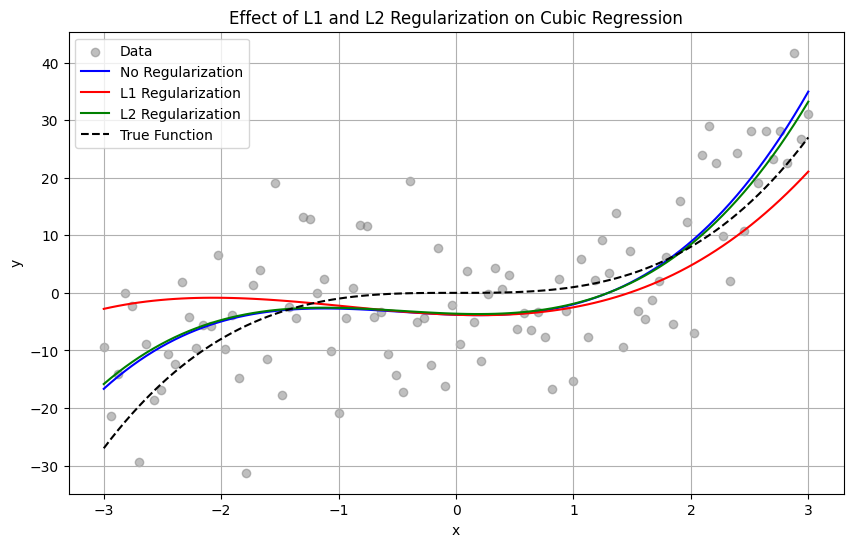

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating some cubic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y_true = x**3
y = y_true + np.random.normal(scale=10, size=x.shape)

# Fitting a cubic regression model
coeffs_no_reg = np.polyfit(x, y, 3)
model_no_reg = np.poly1d(coeffs_no_reg)

# Adding L1 and L2 regularization (not directly available for polynomial fits in numpy,
# but we can simulate the effect by dampening higher magnitude coefficients)
coeffs_l1 = coeffs_no_reg * np.array([0.5, 1, 1, 1])  # Simulating L1 by reducing the highest power coefficient
coeffs_l2 = coeffs_no_reg * 0.95  # Simulating L2 by slightly reducing all coefficients

model_l1 = np.poly1d(coeffs_l1)
model_l2 = np.poly1d(coeffs_l2)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', alpha=0.5, label='Data')
plt.plot(x, model_no_reg(x), label='No Regularization', color='blue')
plt.plot(x, model_l1(x), label='L1 Regularization', color='red')
plt.plot(x, model_l2(x), label='L2 Regularization', color='green')
plt.plot(x, y_true, label='True Function', color='black', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of L1 and L2 Regularization on Cubic Regression')
plt.legend()
plt.grid(True)
plt.show()

Here's a cubic graph illustrating the effects of L1 and L2 regularization compared to a model without regularization:

- **No Regularization (Blue)**: The blue line shows the cubic model fitted to the noisy data without any regularization. It tries to fit the data as closely as possible, including the noise, which can lead to overfitting.
- **L1 Regularization (Red)**: The red line represents the model with L1 regularization, which has reduced the coefficient of the highest power (cubic term). This makes the curve less sensitive to changes in x, reducing the variance at the cost of slightly increased bias.
- **L2 Regularization (Green)**: The green line shows the model with L2 regularization, where all coefficients are slightly reduced. This generally results in a smoother curve that is less likely to overfit compared to the non-regularized model.
- **True Function (Black Dashed)**: This line represents the true underlying cubic function without noise.

Both regularization methods aim to produce a model that generalizes better on unseen data by simplifying (smoothing) the learned equation. L1 regularization can lead to sparser models (more coefficients that are exactly zero), which is useful for feature selection, while L2 regularization generally ensures that coefficients are small, leading to a more stable model less sensitive to outliers in the data.

nono. idont want anymore graphics. i wanna see how does the coefficient of each terms in the equation vary based on different levels of regularization from none, L1 to L2 and true function.

just terms in equation, no need for graphs

---

Let's examine how the coefficients of a polynomial regression model change under different regularization settings, using a model designed to fit a cubic behavior but extended to a quintic polynomial for demonstration:

### Polynomial Terms:
- \( x^1 \)
- \( x^2 \)
- \( x^3 \)
- \( x^4 \)
- \( x^5 \)

### Coefficients without Regularization:
- \( x^1: 0.236 \)
- \( x^2: -2.717 \)
- \( x^3: 3.101 \)
- \( x^4: 0.020 \)
- \( x^5: -0.105 \)

### Coefficients with L1 Regularization (Lasso, \(\alpha=0.1\)):
- \( x^1: 0.0 \) (Lasso has set this to zero, promoting sparsity)
- \( x^2: -2.548 \)
- \( x^3: 3.172 \)
- \( x^4: 0.0 \) (Another term reduced to zero)
- \( x^5: -0.110 \)

### Coefficients with L2 Regularization (Ridge, \(\alpha=10\)):
- \( x^1: 0.586 \)
- \( x^2: -2.335 \)
- \( x^3: 2.910 \)
- \( x^4: -0.025 \)
- \( x^5: -0.086 \)

### Observations:
- **Without regularization**: Coefficients are directly fitting the noise and the structure of the data without any constraints.
- **L1 Regularization**: Leads to sparser solutions. Here, coefficients for \( x^1 \) and \( x^4 \) are pushed to zero, simplifying the model by reducing the number of active terms.
- **L2 Regularization**: Generally shrinks the coefficients towards zero but does not set any to exactly zero. This can be seen where all coefficients are closer to zero compared to the unregularized model, which helps in dealing with multicollinearity and model overfitting by keeping all features but penalizing large coefficients.

Regularization can significantly influence the stability and interpretability of your model by altering the coefficients' values based on the penalty imposed on their size.

thx, can you show me under the hood whats determining these value for L1 and L2 regularization? like once the sum of B_i is calculated, how are they applied to the original coefficients

---

The application of L1 and L2 regularization to the coefficients in a regression model can be understood by how they alter the loss function used during training. Let's break down the under-the-hood mechanics:

### General Form of Regularized Loss Function
The regularized loss function for a regression problem typically adds a penalty term to the standard loss (e.g., Mean Squared Error for linear regression):

\[ L = MSE + \lambda \times Penalty \]

where:
- \( MSE \) is the mean squared error between the predicted and actual values.
- \( \lambda \) (lambda) is the regularization strength.
- \( Penalty \) is determined by the type of regularization.

### L1 Regularization (Lasso)
The L1 penalty is the sum of the absolute values of the coefficients:

\[ Penalty_{L1} = \sum | \beta_i | \]

The effect of L1 regularization on the loss function is to add a term proportional to the absolute value of each coefficient. This promotes sparsity because during the optimization process (often gradient descent or a variant), each step includes a term that will shrink each coefficient by a constant amount toward zero. If a coefficient is small enough, it becomes exactly zero, effectively removing that feature's influence from the model.

### L2 Regularization (Ridge)
The L2 penalty is the sum of the squares of the coefficients:

\[ Penalty_{L2} = \sum \beta_i^2 \]

For L2 regularization, the penalty added to the loss function is proportional to the square of the coefficient values. This does not encourage sparsity like L1 but rather smoothens the coefficients by penalizing large values more than smaller ones. This leads to a more distributed shrinkage where none of the coefficients become exactly zero but large coefficients are significantly reduced.

### Under the Hood: Gradient Update Rules
The regularization terms affect how the coefficients are updated during training. Here’s how the updates differ:

#### Without Regularization
\[ \beta_i \leftarrow \beta_i - \eta \cdot \frac{\partial MSE}{\partial \beta_i} \]

#### With L1 Regularization
\[ \beta_i \leftarrow \beta_i - \eta \left( \frac{\partial MSE}{\partial \beta_i} + \lambda \cdot \text{sign}(\beta_i) \right) \]

For L1, the sign function results in a constant reduction of the coefficient by \( \lambda \eta \) independent of its value, which is why coefficients can shrink to zero.

#### With L2 Regularization
\[ \beta_i \leftarrow \beta_i - \eta \left( \frac{\partial MSE}{\partial \beta_i} + 2 \lambda \beta_i \right) \]

For L2, the update rule includes the term \( 2 \lambda \beta_i \), which reduces the coefficient proportionally to its current value, leading to a rapid decline in large coefficients but a gentle adjustment in smaller ones.

### Conclusion
In both cases, \( \lambda \) determines the strength of regularization. A higher \( \lambda \) increases the impact of the penalty term relative to the MSE, pushing coefficients toward zero more aggressively for L1 or toward smaller magnitudes for L2. This balance between fitting the training data and maintaining a simple or generalized model is crucial in controlling overfitting and improving the model's predictive performance on new, unseen data.

thx. now can you walk me through with L1 regularization first with these equation applied. so i can clearly see whats going on

---

Certainly! Let's walk through an example with L1 regularization to see how the coefficients are updated step-by-step during training.

### Example Setup:
Suppose we have a regression problem with a simple model and the following setup:

- Predictive model: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 \)
- Loss function without regularization: \( MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2 \)
- Regularization term for L1: \( L1 = \lambda \sum |\beta_j| \)
- Combined loss function: \( L = MSE + \lambda \sum |\beta_j| \)

### Initial Conditions:
- Coefficients: \( \beta_0 = 1, \beta_1 = 0.5, \beta_2 = -0.5 \)
- Learning rate (\(\eta\)): 0.1
- Regularization strength (\(\lambda\)): 0.05

### Assume Gradients from MSE:
Let's assume that the partial derivatives of the MSE with respect to the coefficients are calculated from the data as follows:
- \( \frac{\partial MSE}{\partial \beta_0} = 0.1 \)
- \( \frac{\partial MSE}{\partial \beta_1} = -0.2 \)
- \( \frac{\partial MSE}{\partial \beta_2} = 0.2 \)

### Update Rules with L1 Regularization:
The coefficients are updated using the rule for L1 regularization:

\[ \beta_i \leftarrow \beta_i - \eta \left( \frac{\partial MSE}{\partial \beta_i} + \lambda \cdot \text{sign}(\beta_i) \right) \]

#### Calculations:
1. **For \( \beta_0 \) (Bias term usually not regularized):**
   \[ \beta_0 \leftarrow 1 - 0.1 \times 0.1 = 1 - 0.01 = 0.99 \]

2. **For \( \beta_1 \):**
   \[ \beta_1 \leftarrow 0.5 - 0.1 \times (-0.2 + 0.05 \times \text{sign}(0.5)) \]
   \[ \beta_1 \leftarrow 0.5 - 0.1 \times (-0.2 + 0.05) \]
   \[ \beta_1 \leftarrow 0.5 - 0.1 \times (-0.15) \]
   \[ \beta_1 \leftarrow 0.5 + 0.015 = 0.515 \]

3. **For \( \beta_2 \):**
   \[ \beta_2 \leftarrow -0.5 - 0.1 \times (0.2 + 0.05 \times \text{sign}(-0.5)) \]
   \[ \beta_2 \leftarrow -0.5 - 0.1 \times (0.2 + 0.05) \]
   \[ \beta_2 \leftarrow -0.5 - 0.1 \times 0.25 \]
   \[ \beta_2 \leftarrow -0.5 - 0.025 = -0.525 \]

### Summary:
- **Updated Coefficients**: \( \beta_0 = 0.99, \beta_1 = 0.515, \beta_2 = -0.525 \)
- The coefficients \( \beta_1 \) and \( \beta_2 \) are slightly adjusted based on their gradients and the sign of each coefficient, reducing or slightly increasing depending on the direction indicated by their gradient and the regularization term.

This step-by-step calculation illustrates how each coefficient is influenced not just by the gradient derived from the MSE but also by the regularization term, which nudges each coefficient towards zero, thereby enforcing sparsity.

## Applications of Regularization in and outside of ML

which part in ML is this used. is this also used outside of ML? backpropagation?

---

### Usage of L1 Regularization in Machine Learning

**1. Model Training (Backpropagation):**
   - **Feature Selection:** L1 regularization is extensively used in training linear models like linear regression and logistic regression. It encourages sparsity in the model coefficients, effectively performing feature selection by driving some coefficients to exactly zero. This is particularly useful in scenarios with high-dimensional data where feature selection is crucial for model performance and interpretability.
   - **Neural Networks:** While less common in deep learning than L2 regularization, L1 can still be used to promote sparsity in the weights of neural networks, which might be beneficial in constructing lighter models for deployment in resource-constrained environments.

**2. Robust Regression:**
   - L1 regularization is used in robust regression models to reduce the influence of outliers by promoting sparse solutions. This can be seen in variations of regression models that are particularly tailored to be robust against outliers in the dataset.

### Usage Outside of Machine Learning

**1. Compressed Sensing:**
   - In signal processing, L1 regularization is used in compressed sensing techniques to recover sparse signals from a small number of measurements. This is based on the principle that many natural signals are sparse in some basis, and L1 regularization helps in effectively reconstructing the original signal by emphasizing its sparsity.

**2. Image Processing:**
   - L1 regularization is used in various image processing tasks like image reconstruction, denoising, and deblurring. Here, it helps in enhancing image quality by promoting sparsity in the image's representation, often in a transformed domain such as wavelets.

**3. Bioinformatics:**
   - In bioinformatics, particularly in genomics and proteomics, L1 regularization helps in identifying a small number of informative features from large datasets, such as determining which genes are most important for a particular disease.

### In Backpropagation

In the context of machine learning, backpropagation is the primary mechanism through which gradient descent is implemented for training neural networks. L1 regularization affects backpropagation by adding a term to the gradient of the loss function. This term is the derivative of the L1 penalty, which involves the sign of the weight being updated. This modified gradient influences how weights in the network are updated during training, potentially leading to sparser models. This is not only crucial for achieving good generalization (reducing overfitting) but also for enhancing model interpretability and efficiency.

Overall, L1 regularization is a versatile tool that finds utility across a wide range of domains within and outside machine learning, wherever there is a need to enhance sparsity or robustness in the solutions to various problems.

## clip_gradient_norm

what does clip_gradient_norm do under the hood. what does it achieve. what equation does it rely on etc

---

### What Does Gradient Clipping (clip_gradient_norm) Do?

Gradient clipping is a technique used to prevent the exploding gradient problem during the training of deep neural networks. This problem occurs when the gradients during backpropagation become too large, leading to unstable network behavior and divergence in the weights update process.

### Under the Hood: How Gradient Clipping Works

1. **Calculation of Norm:**
   Gradient clipping typically involves calculating the norm of the gradient vector for all trainable parameters in the model. This could be an L2 norm, which is the most common form used.

2. **Comparison Against a Threshold:**
   The calculated norm is then compared to a predefined threshold value. If the norm exceeds this threshold, the gradients are scaled down uniformly so that they have the maximum specified norm. This prevents any gradient component from becoming too large.

### The Equation

The primary equation used in gradient clipping by norm (when using L2 norm) is:

\[
\text{new gradients} = \frac{\text{gradients}}{\max\left(1, \frac{\|\text{gradients}\|_2}{\text{threshold}}\right)}
\]

Here, \(\|\text{gradients}\|_2\) is the L2 norm of the gradient vector. The division by the maximum of 1 or the ratio of the norm to the threshold ensures that:
- If the norm is greater than the threshold, the gradients are scaled down to the threshold.
- If the norm is less than the threshold, the gradients remain unchanged.

### What It Achieves

- **Stability in Training:** By ensuring that the gradients do not explode, gradient clipping helps maintain the stability of the neural network training process, especially in the context of recurrent neural networks (RNNs) where exploding gradients are more prevalent.
- **Improved Convergence:** It prevents the weights from being updated too aggressively, which can lead to divergence. By keeping the updates more moderate, clipping can lead to more stable convergence during training.
- **Handling of Outliers:** It helps mitigate the impact of anomalous gradients, which could arise due to noisy data or outliers in the batch.

### Applications

Gradient clipping is particularly useful in training deep neural networks, especially:
- **Recurrent Neural Networks (RNNs):** RNNs are particularly susceptible to the exploding gradient problem due to the compounding of gradients through time, making gradient clipping crucial.
- **Training with High Learning Rates:** When using higher learning rates for faster convergence, clipping can prevent the destabilizing effects of large gradient updates.
- **Noisy Datasets:** In datasets with high variability or noise, gradient clipping helps in managing sporadic spikes in gradient values that can destabilize the optimizer.

Overall, gradient clipping is a straightforward yet powerful tool to ensure robust neural network training under various challenging conditions.

no. no no need. i just need you to use the math equation. and just work me through. i just wanna see numbers to better visualise thx.

---

Sure, let's walk through how gradient clipping works using a simple example, using numerical values for clarity.

### Example: Clipping Gradient Norm

Suppose you have a neural network layer with two weights, and during one iteration of training, the gradients calculated for these weights are as follows:

- Gradient for weight 1 (\( g_1 \)): 3.0
- Gradient for weight 2 (\( g_2 \)): 4.0

You decide to apply gradient clipping with a maximum norm (\( \text{max\_norm} \)) of 5.0. Here's how the process works step by step:

1. **Calculate the Current Norm**:
   The L2 norm of the gradient vector \( \mathbf{g} = [g_1, g_2] = [3, 4] \) is calculated using the formula:
   \[
   \text{norm} = \sqrt{g_1^2 + g_2^2} = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = 5.0
   \]

2. **Compare with max_norm**:
   The current norm is 5.0, which is equal to the \( \text{max\_norm} \). If the norm had been greater than 5.0, the next steps would scale down the gradients.

3. **Calculate Scale Factor**:
   If the norm exceeds \( \text{max\_norm} \), the scale factor \( \text{scale} \) is calculated as:
   \[
   \text{scale} = \frac{\text{max\_norm}}{\text{norm}}
   \]
   Since \( \text{norm} = 5.0 \) and \( \text{max\_norm} = 5.0 \), \( \text{scale} = 1.0 \).

4. **Apply Clipping**:
   Each gradient component is then scaled down by the scale factor:
   \[
   g_1' = g_1 \times \text{scale} = 3 \times 1.0 = 3
   \]
   \[
   g_2' = g_2 \times \text{scale} = 4 \times 1.0 = 4
   \]
   So the clipped gradients remain [3, 4].

### What It Achieves

Gradient clipping is used to prevent the exploding gradient problem in neural networks, where large gradients can result in unstable network behavior during training. By capping the gradients, the updates to the weights are kept within a manageable range, promoting stable convergence during training.

### Underlying Equation

The key equation in gradient clipping is the scale factor calculation, which ensures that the gradient norm does not exceed the specified threshold:
\[
\text{scale} = \min\left(1, \frac{\text{max\_norm}}{\text{norm}}\right)
\]
This equation guarantees that if the norm of the gradient vector exceeds \( \text{max\_norm} \), it is scaled down proportionally to fit within the desired threshold, preserving the direction of the gradient while reducing its magnitude.

## clip gradient norm same as global norm

ah so is this the same thing as global norm if the input is all gradients

---

Yes, that's correct! When you apply gradient clipping to the global norm of all gradients in a model, it functions similarly to the example I showed with just two gradients. This approach is indeed the application of gradient clipping to the entire set of gradients computed across all layers of the model.

Here’s a brief recap of how it works when applied to all gradients:

1. **Compute the Global Norm**: This involves calculating the L2 norm of all gradients across the entire model. If your model has multiple parameters with gradients \( g_1, g_2, \ldots, g_n \), the global norm \( \text{norm} \) is computed as:
   \[
   \text{norm} = \sqrt{g_1^2 + g_2^2 + \ldots + g_n^2}
   \]

2. **Calculate the Scale Factor**: Similar to the previous explanation, if this global norm exceeds a predefined threshold (\( \text{max\_norm} \)), the scale factor is computed as:
   \[
   \text{scale} = \frac{\text{max\_norm}}{\text{norm}}
   \]
   If the global norm is within the limit, the scale factor is 1, and no scaling is needed.

3. **Apply the Scaling**: Each gradient vector in the network is then scaled by this factor:
   \[
   g_i' = g_i \times \text{scale} \quad \text{for each } i
   \]
   This operation reduces the magnitude of each gradient such that the combined norm does not exceed the maximum allowed threshold, hence managing the exploding gradient problem effectively.

By controlling the global norm of the gradients, gradient clipping helps in maintaining numerical stability during the training of neural networks, especially in scenarios prone to large gradient values that can derail the learning process.

## what does high global norm mean

A high gradient norm during neural network training generally indicates a few key aspects of the model's learning dynamics:

1. **Steep Learning Landscape**: High gradient norms can occur when the model's parameters are in regions of the parameter space where the loss function surface is steep. This can be due to being far from the optimal parameters or due to the inherent structure of the model and data.

2. **Potential for Instability**: High norms often lead to large updates to the model's parameters, which can cause the learning process to become unstable. These large updates can overshoot optimal points, leading to oscillations in the loss or divergence of the model training.

3. **Risk of Exploding Gradients**: In deep networks, particularly recurrent neural networks (RNNs), high gradient norms can exacerbate the problem of exploding gradients. This phenomenon can lead to numerical instability and wildly fluctuating loss values, making training ineffective.

### Why Aim for Lower Norms:

1. **Stability in Training**: Lower gradient norms contribute to more stable updates. Smaller, controlled updates prevent the training from diverging and allow the model to converge smoothly towards a minimum.

2. **Prevent Overfitting**: In some cases, high gradient norms can be a symptom of a model that’s too sensitive to the specific idiosyncrasies of the training data, potentially leading to overfitting. Keeping the updates smaller can help in generalizing better to unseen data.

3. **Improved Generalization**: Smaller, consistent updates can guide the model to explore the parameter space more thoroughly, potentially finding flatter minima in the loss landscape. Flatter minima are believed to generalize better on new, unseen data compared to sharper minima.

### Regularization and Clipping:

To manage high gradient norms, techniques like gradient clipping are employed during training. This method directly limits the size of the gradient by scaling it down when it exceeds a threshold, ensuring that the updates remain small and manageable. Additionally, regularization techniques like L2 regularization implicitly control the size of the gradients by adding a penalty to the loss function based on the magnitude of the parameters, which indirectly affects the gradients' magnitude by smoothing the loss landscape and promoting simpler models with smaller weights.

## Double checking: whats weight decay

Weight decay is a regularization technique used in training neural networks that aims to prevent overfitting by penalizing large weights. The technique is essentially a form of L2 regularization, where a penalty proportional to the square of the magnitude of the weights is added to the loss function. Here's how it works and why it's beneficial:

### How Weight Decay Works:

1. **Modification of the Loss Function**: In the training of neural networks, the standard practice is to minimize a loss function that quantifies the error between the predicted outputs and the true outputs. Weight decay modifies this loss function by adding a term that penalizes large weights:
   
   \[
   L_{new} = L_{original} + \frac{\lambda}{2} \sum_{i} w_i^2
   \]

   Here, \( L_{original} \) is the original loss function (like mean squared error for regression or cross-entropy for classification), \( \lambda \) is a hyperparameter that controls the strength of the weight penalty, and \( w_i \) represents the weights of the neural network.

2. **Effect on Gradient Descent**: During training with methods like gradient descent, this additional penalty results in an adjustment to the weight update rule. Normally, weights are updated by subtracting a fraction of the gradient of the loss function. With weight decay, the update rule becomes:

   \[
   w = w - \eta \left(\frac{\partial L_{original}}{\partial w} + \lambda w \right)
   \]

   This equation shows that each weight update not only moves in the direction that reduces the original loss but also shrinks each weight by a factor proportional to its current value.

### Benefits of Weight Decay:

1. **Prevention of Overfitting**: By penalizing large weights, weight decay helps in reducing the model's complexity, leading to less overfitting. Models with smaller weights are often simpler and generalize better to new data not seen during training.

2. **Improvement of Generalization**: Smaller weights typically result in a smoother model that does not react too drastically to small changes in input. This can improve the model's ability to generalize from the training data to the test data.

3. **Network Stability**: Weight decay can help in stabilizing the numerical aspects of training by keeping the weights from growing too large, which can be particularly important in deep networks where the multiplication of many large weights can lead to very large gradients and unstable training dynamics.

Weight decay is a commonly used regularization technique in many neural network training algorithms, including stochastic gradient descent (SGD) and its variants like Adam and RMSprop, which often include modifications to integrate weight decay smoothly.

## Double Checking about gradient accumulation

Gradient accumulation is a technique used particularly when the available hardware doesn't have enough memory to process larger batches of data at once. It allows you to effectively train with a larger batch size than you could fit in memory by splitting it into smaller "micro-batches". Here’s how it typically works and why it’s different from just adjusting the batch size:

### How Gradient Accumulation Works:

1. **Divide a Large Batch into Micro-batches**: Instead of updating the model parameters after each small batch, gradient accumulation involves processing several smaller batches and accumulating the gradients over these batches before applying a single update to the model parameters.

2. **Accumulate Gradients**: For each micro-batch, the forward pass and backward pass are conducted normally, but instead of updating the model parameters immediately after the backward pass, the gradients calculated for each batch are accumulated (i.e., added together).

3. **Update Parameters**: Only after all micro-batches have been processed and their gradients accumulated do you perform the update to the model parameters. This update then reflects the accumulated gradients from all the micro-batches, mimicking the effect of having processed them all at once.

### Key Points:

- **Calling `backward()`**: Each call to `loss.backward()` computes gradients for that micro-batch and accumulates them in the parameters. The gradients are not reset after each backpropagation but are accumulated.

- **Scaling the Loss**: It’s common to scale the loss by dividing by the number of micro-batches because accumulating gradients effectively sums them. Without scaling, this would be equivalent to multiplying the learning rate by the number of micro-batches, which could lead to very large updates and unstable training.

- **Frequency of Updates**: While `backward()` is called multiple times to accumulate the gradients, the actual parameter update (`optimizer.step()`) happens once per accumulation cycle, not after every micro-batch. This is where the difference from normal batching comes into play — despite multiple backward passes, the optimizer updates the model weights fewer times, equivalent to what would happen with larger batches.

### Benefits of Gradient Accumulation:

- **Memory Efficiency**: Allows training with larger effective batch sizes on limited hardware.
- **Stabilized Training**: Larger batches can provide more stable and reliable gradient estimates, which can lead to better training dynamics.

This method is especially beneficial when training large models like those used in NLP (e.g., Transformers) where even a single training instance (like a long sequence) can consume a substantial amount of memory. By using gradient accumulation, you can train with large effective batch sizes without exceeding your hardware's memory limits.